In [117]:
# Dependencies and Setup
# Water consumption
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path


In [118]:
# File to Load (Remember to Change These)
path = Path("Resources/austin_water.csv")
customer_data_df = pd.read_csv(path)
customer_data_df.head()

,Year Month,Postal Code,Customer Class,Total Gallons
0,201201,78613,Irrigation - Multi-Family,11000
1,201201,78613,Multi-Family,23000
2,201201,78617,Residential,19840800
3,201201,78617,Multi-Family,2477000
4,201201,78652,Irrigation - Residential,38500


In [119]:
# Filter the data to only include the data for years 2013-2017

customer_data_df['Year Month'] = pd.to_datetime(customer_data_df['Year Month'], format='%Y%m')

filtered_data = customer_data_df[(customer_data_df['Year Month'].dt.year >= 2013) & (customer_data_df['Year Month'].dt.year <= 2017)]

filtered_data

# Making the date an index
date_index_df = filtered_data.set_index('Year Month', inplace=False)

In [120]:
# Grouping by Customer Class and Time
cust_class_totals = filtered_data.groupby(['Customer Class'])['Total Gallons'].sum()

time_totals = filtered_data.groupby(['Year Month'])['Total Gallons'].sum()

#time_totals
cust_class_totals

Customer Class
Irrigation - Multi-Family     3871926600
Irrigation - Residential       197562900
Multi-Family                 41908434000
Residential                  71727421200
Name: Total Gallons, dtype: int64

In [121]:
# Sorting for time
time_sort = time_totals.sort_values(ascending=False)

time_sort

Year Month
2015-08-01    2763112500
2015-09-01    2684620600
2013-09-01    2593170700
2014-09-01    2564459200
2017-08-01    2547847000
2013-08-01    2534850100
2013-07-01    2491107800
2016-08-01    2470237400
2017-07-01    2466226200
2016-07-01    2415686400
2015-10-01    2401311400
2014-08-01    2358940000
2017-09-01    2353679000
2016-09-01    2156562700
2014-07-01    2134472900
2016-10-01    2107208900
2013-06-01    2104754100
2017-06-01    2098386200
2015-07-01    2033398200
2013-05-01    2019089400
2017-10-01    2018448000
2013-10-01    2017698100
2014-06-01    2005111400
2014-05-01    1985723400
2017-05-01    1979500400
2016-11-01    1947654300
2014-11-01    1945344400
2013-01-01    1907330000
2014-10-01    1904262000
2013-04-01    1875674700
2017-11-01    1867682000
2016-06-01    1856758200
2015-11-01    1849563900
2014-04-01    1779458600
2015-01-01    1776078100
2016-04-01    1770805400
2014-01-01    1761888000
2016-12-01    1761018500
2017-01-01    1754559800
2013-03-01    

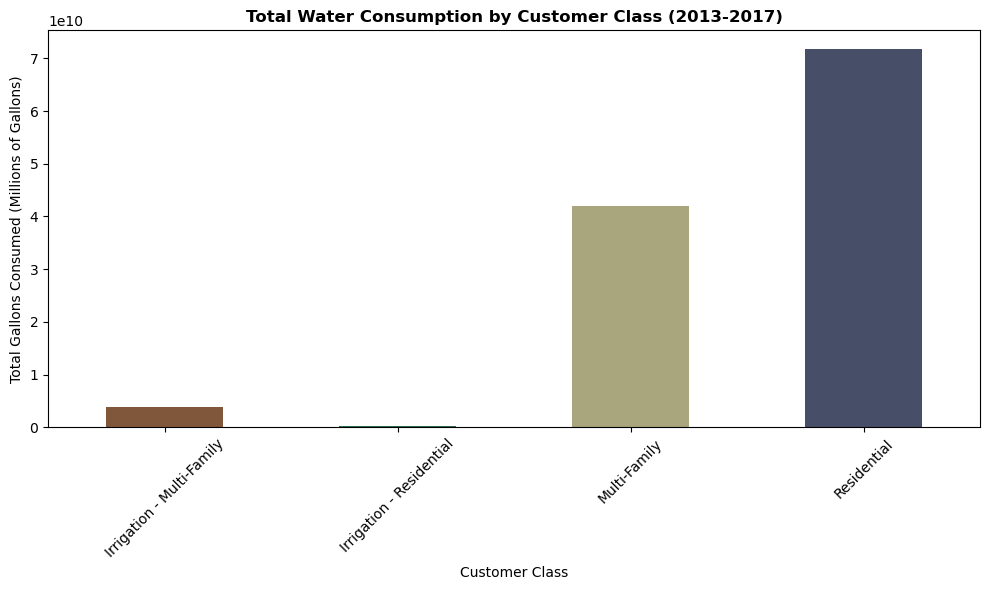

In [122]:
# Creating bar graph for Customer Class totals

plt.figure(figsize=(10, 6))
cust_class_totals.plot(kind='bar', color=["#81573B", "#2E6D4F", "#A9A57C", "#464E68"])
plt.xlabel('Customer Class')
plt.ylabel('Total Gallons Consumed (Millions of Gallons)')
plt.title('Total Water Consumption by Customer Class (2013-2017)', weight="bold")

# Formatting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [123]:
# Create line plot 
#filtered_data['Total Gallons'].plot(kind='line',figsize=(10, 5))
#plt.xlabel('Year')
#plt.ylabel('Total Gallons Consumed (Millions of Gallons)')
#plt.title('Top 10 Year Month with Highest Water Consumption (2013-2017)')



In [124]:
#Filtering for Multi-Family Customer Class

m_fam_data = filtered_data[(filtered_data['Customer Class'] == 'Multi-Family')]

m_fam_totals = m_fam_data.groupby(['Year Month'])['Total Gallons'].sum()

m_fam_totals


Year Month
2013-01-01    707732600
2013-02-01    626891400
2013-03-01    634054000
2013-04-01    653163100
2013-05-01    683950800
2013-06-01    689307600
2013-07-01    703111300
2013-08-01    737141200
2013-09-01    730880400
2013-10-01    707116300
2013-11-01    679878700
2013-12-01    652592900
2014-01-01    712447500
2014-02-01    628043600
2014-03-01    617660100
2014-04-01    655641400
2014-05-01    658407200
2014-06-01    685999300
2014-07-01    694363100
2014-08-01    705901900
2014-09-01    751096100
2014-10-01    674990700
2014-11-01    701241900
2014-12-01    665498300
2015-01-01    718464300
2015-02-01    617807800
2015-03-01    689216600
2015-04-01    654999600
2015-05-01    648225500
2015-06-01    675209300
2015-07-01    712372900
2015-08-01    746551600
2015-09-01    763714200
2015-10-01    742735200
2015-11-01    688023900
2015-12-01    697619100
2016-01-01    720776000
2016-02-01    659902600
2016-03-01    698577100
2016-04-01    701283900
2016-05-01    682013600
2016-

In [125]:
#Filtering for Residential Customer Class

residential_data = filtered_data[(filtered_data['Customer Class'] == 'Residential')]

residential_totals = residential_data.groupby(['Year Month'])['Total Gallons'].sum()

residential_totals

Year Month
2013-01-01    1153857500
2013-02-01     957068300
2013-03-01    1069386600
2013-04-01    1169094100
2013-05-01    1269357300
2013-06-01    1343032600
2013-07-01    1696994000
2013-08-01    1698762900
2013-09-01    1762315900
2013-10-01    1234582300
2013-11-01     996318500
2013-12-01     936570300
2014-01-01    1024850200
2014-02-01     892156200
2014-03-01     897475200
2014-04-01    1078080000
2014-05-01    1265354900
2014-06-01    1247636400
2014-07-01    1362417100
2014-08-01    1560833400
2014-09-01    1707122900
2014-10-01    1148533600
2014-11-01    1181816100
2014-12-01     949144900
2015-01-01    1030326000
2015-02-01     814455900
2015-03-01     903482000
2015-04-01     973063500
2015-05-01     947894400
2015-06-01     982334800
2015-07-01    1247813000
2015-08-01    1897567800
2015-09-01    1781187700
2015-10-01    1535852700
2015-11-01    1085804100
2015-12-01     931199000
2016-01-01     960174100
2016-02-01     917687600
2016-03-01    1003893400
2016-04-01    

In [126]:
# Filtering for any zip code including Irrigation - Multi-Family Customer Class

irr_m_fam_data = filtered_data[(filtered_data['Customer Class'] == 'Irrigation - Multi-Family')]

irr_m_fam_totals = irr_m_fam_data.groupby(['Year Month'])['Total Gallons'].sum()

irr_m_fam_totals

Year Month
2013-01-01     43074300
2013-02-01     37587300
2013-03-01     40331000
2013-04-01     50158700
2013-05-01     62340500
2013-06-01     68847100
2013-07-01     85909600
2013-08-01     93580500
2013-09-01     94209800
2013-10-01     72288200
2013-11-01     49159700
2013-12-01     25659800
2014-01-01     22911400
2014-02-01     17238800
2014-03-01     24106900
2014-04-01     43282600
2014-05-01     58372300
2014-06-01     68154800
2014-07-01     74011300
2014-08-01     87535200
2014-09-01    101013000
2014-10-01     77364700
2014-11-01     59088700
2014-12-01     35903000
2015-01-01     25748400
2015-02-01     17609600
2015-03-01     20213900
2015-04-01     31697000
2015-05-01     43705100
2015-06-01     43003800
2015-07-01     69544400
2015-08-01    111612600
2015-09-01    132985300
2015-10-01    116941900
2015-11-01     72742600
2015-12-01     45677100
2016-01-01     33969700
2016-02-01     32786600
2016-03-01     41092100
2016-04-01     49627300
2016-05-01     52670400
2016-

In [127]:
# Filtering for any zip code including Irrigation - Residential Customer Class

irr_res_data = filtered_data[(filtered_data['Customer Class'] == 'Irrigation - Residential')]

irr_res_totals = irr_res_data.groupby(['Year Month'])['Total Gallons'].sum()

irr_res_totals


Year Month
2013-01-01    2665600
2013-02-01    2038500
2013-03-01    3061100
2013-04-01    3258800
2013-05-01    3440800
2013-06-01    3566800
2013-07-01    5092900
2013-08-01    5365500
2013-09-01    5764600
2013-10-01    3711300
2013-11-01    1948400
2013-12-01    1463200
2014-01-01    1678900
2014-02-01    1516200
2014-03-01    1770200
2014-04-01    2454600
2014-05-01    3589000
2014-06-01    3320900
2014-07-01    3681400
2014-08-01    4669500
2014-09-01    5227200
2014-10-01    3373000
2014-11-01    3197700
2014-12-01    1674900
2015-01-01    1539400
2015-02-01    1051900
2015-03-01    1225100
2015-04-01    1885000
2015-05-01    1926800
2015-06-01    1883000
2015-07-01    3667900
2015-08-01    7380500
2015-09-01    6733400
2015-10-01    5781600
2015-11-01    2993300
2015-12-01    1559600
2016-01-01    1307900
2016-02-01    2060100
2016-03-01    2515500
2016-04-01    2334700
2016-05-01    1826900
2016-06-01    2208700
2016-07-01    5277900
2016-08-01    5918200
2016-09-01    4387200

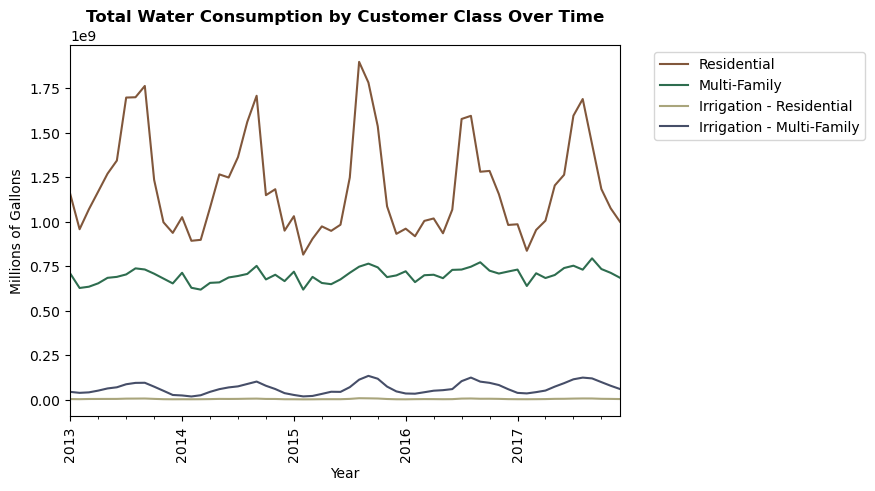

In [130]:
# Plotting the filtered datasets for each customer class
residential_totals.plot(color="#81573B")
m_fam_totals.plot(color="#2E6D4F")
irr_res_totals.plot(color="#A9A57C")
irr_m_fam_totals.plot(color="#464E68")

# Setting the labels and title
plt.xlabel('Year')
plt.ylabel('Millions of Gallons')
plt.title('Total Water Consumption by Customer Class Over Time', weight="bold")
plt.tight_layout()

# Set the x-axis tick labels
#years=[2013, 2014, 2015, 2016, 2017, 2018]
#ticks=years, parameters=years, labels=['2013', '2014', '2015', '2016', '2017', '2018'], 
plt.xticks(rotation=90)

plt.legend(['Residential', 'Multi-Family','Irrigation - Residential', 'Irrigation - Multi-Family'], bbox_to_anchor=(1.05, 1))




